In [2]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "C:/Users/Chun Lok/Downloads/as-caida"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()

    for i in range(8, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()

    for i in range(8, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def RoundRobin_probing(node_list, current_graph, count) :
    loopnode = -1
    while True :
        loopnode = node_list[count]
        count += 1
        if loopnode == node_list[-1] :
            count = 0
        if current_graph.has_node(loopnode):
            break

    return loopnode, count

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [3]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "C:/Users/Chun Lok/Downloads/as-caida/" + list_of_file[i]  
    
# print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))
node_list = list(G.nodes())
count = 0
K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node, count= RoundRobin_probing(node_list, g, count)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
    
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


Loading…:   1%|▏                         | 1/121 [00:51<1:42:03, 51.03s/it]

True


Loading…:   2%|▍                         | 2/121 [01:41<1:40:06, 50.48s/it]

True


Loading…:   2%|▋                         | 3/121 [02:32<1:39:38, 50.67s/it]

True


Loading…:   3%|▊                         | 4/121 [03:21<1:38:10, 50.35s/it]

True


Loading…:   4%|█                         | 5/121 [04:13<1:38:30, 50.95s/it]

True


Loading…:   5%|█▎                        | 6/121 [05:06<1:38:48, 51.55s/it]

True


Loading…:   6%|█▌                        | 7/121 [05:59<1:38:36, 51.90s/it]

True


Loading…:   7%|█▋                        | 8/121 [06:55<1:40:06, 53.16s/it]

True


Loading…:   7%|█▉                        | 9/121 [07:50<1:40:17, 53.73s/it]

True


Loading…:   8%|██                       | 10/121 [08:45<1:40:14, 54.18s/it]

True


Loading…:   9%|██▎                      | 11/121 [09:43<1:41:35, 55.42s/it]

True


Loading…:  10%|██▍                      | 12/121 [10:41<1:41:52, 56.08s/it]

True


Loading…:  11%|██▋                      | 13/121 [11:38<1:41:54, 56.62s/it]

True


Loading…:  12%|██▉                      | 14/121 [12:39<1:43:05, 57.80s/it]

True


Loading…:  12%|███                      | 15/121 [13:38<1:42:37, 58.09s/it]

True


Loading…:  13%|███▎                     | 16/121 [14:38<1:42:53, 58.79s/it]

True


Loading…:  14%|███▌                     | 17/121 [15:37<1:42:02, 58.87s/it]

True


Loading…:  15%|███▋                     | 18/121 [16:40<1:42:58, 59.99s/it]

True


Loading…:  16%|███▉                     | 19/121 [17:41<1:42:42, 60.42s/it]

True


Loading…:  17%|████▏                    | 20/121 [18:41<1:41:31, 60.31s/it]

True


Loading…:  17%|████▎                    | 21/121 [19:41<1:40:02, 60.02s/it]

True


Loading…:  18%|████▌                    | 22/121 [20:42<1:39:33, 60.34s/it]

True


Loading…:  19%|████▊                    | 23/121 [21:44<1:39:38, 61.01s/it]

True


Loading…:  20%|████▉                    | 24/121 [22:48<1:40:10, 61.97s/it]

True


Loading…:  21%|█████▏                   | 25/121 [23:51<1:39:29, 62.18s/it]

True


Loading…:  21%|█████▎                   | 26/121 [24:54<1:38:35, 62.27s/it]

True


Loading…:  22%|█████▌                   | 27/121 [25:55<1:37:18, 62.12s/it]

True


Loading…:  23%|█████▊                   | 28/121 [26:58<1:36:34, 62.30s/it]

True


Loading…:  24%|█████▉                   | 29/121 [28:01<1:35:54, 62.55s/it]

True


Loading…:  25%|██████▏                  | 30/121 [29:04<1:35:01, 62.65s/it]

True


Loading…:  26%|██████▍                  | 31/121 [30:09<1:34:46, 63.18s/it]

True


Loading…:  26%|██████▌                  | 32/121 [31:13<1:34:25, 63.66s/it]

True


Loading…:  27%|██████▊                  | 33/121 [32:18<1:33:58, 64.08s/it]

True


Loading…:  28%|███████                  | 34/121 [33:23<1:33:05, 64.20s/it]

True


Loading…:  29%|███████▏                 | 35/121 [34:27<1:31:59, 64.18s/it]

True


Loading…:  30%|███████▍                 | 36/121 [35:31<1:30:47, 64.09s/it]

True


Loading…:  31%|███████▋                 | 37/121 [36:36<1:30:19, 64.52s/it]

True


Loading…:  31%|███████▊                 | 38/121 [37:41<1:29:14, 64.52s/it]

True


Loading…:  32%|████████                 | 39/121 [38:47<1:28:55, 65.07s/it]

True


Loading…:  33%|████████▎                | 40/121 [39:56<1:29:15, 66.12s/it]

True


Loading…:  34%|████████▍                | 41/121 [41:09<1:30:59, 68.24s/it]

True


Loading…:  35%|████████▋                | 42/121 [42:15<1:29:08, 67.71s/it]

True


Loading…:  36%|████████▉                | 43/121 [43:21<1:27:18, 67.16s/it]

True


Loading…:  36%|█████████                | 44/121 [44:26<1:25:10, 66.37s/it]

True


Loading…:  37%|█████████▎               | 45/121 [45:43<1:28:09, 69.60s/it]

True


Loading…:  38%|█████████▌               | 46/121 [46:49<1:25:42, 68.57s/it]

True


Loading…:  39%|█████████▋               | 47/121 [47:55<1:23:43, 67.89s/it]

True


Loading…:  40%|█████████▉               | 48/121 [49:09<1:24:28, 69.43s/it]

True


Loading…:  40%|██████████               | 49/121 [50:19<1:23:47, 69.82s/it]

True


Loading…:  41%|██████████▎              | 50/121 [51:26<1:21:28, 68.85s/it]

True


Loading…:  42%|██████████▌              | 51/121 [52:32<1:19:23, 68.05s/it]

True


Loading…:  43%|██████████▋              | 52/121 [53:37<1:17:18, 67.23s/it]

True


Loading…:  44%|██████████▉              | 53/121 [54:53<1:18:55, 69.65s/it]

True


Loading…:  45%|███████████▏             | 54/121 [56:33<1:28:05, 78.89s/it]

True


Loading…:  45%|███████████▎             | 55/121 [58:19<1:35:50, 87.13s/it]

True


Loading…:  46%|██████████▋            | 56/121 [1:00:04<1:40:03, 92.36s/it]

True


Loading…:  47%|██████████▊            | 57/121 [1:01:55<1:44:28, 97.95s/it]

True


Loading…:  48%|███████████            | 58/121 [1:03:39<1:44:44, 99.76s/it]

True


Loading…:  49%|███████████▏           | 59/121 [1:05:01<1:37:30, 94.36s/it]

True


Loading…:  50%|███████████▍           | 60/121 [1:06:18<1:30:39, 89.18s/it]

True


Loading…:  50%|███████████▌           | 61/121 [1:07:35<1:25:38, 85.64s/it]

True


Loading…:  51%|███████████▊           | 62/121 [1:08:53<1:22:02, 83.43s/it]

True


Loading…:  52%|███████████▉           | 63/121 [1:10:10<1:18:35, 81.30s/it]

True


Loading…:  53%|████████████▏          | 64/121 [1:11:28<1:16:17, 80.30s/it]

True


Loading…:  54%|████████████▎          | 65/121 [1:12:50<1:15:35, 80.98s/it]

True


Loading…:  55%|████████████▌          | 66/121 [1:14:06<1:12:49, 79.45s/it]

True


Loading…:  55%|████████████▋          | 67/121 [1:15:24<1:10:56, 78.82s/it]

True


Loading…:  56%|████████████▉          | 68/121 [1:16:41<1:09:08, 78.28s/it]

True


Loading…:  57%|█████████████          | 69/121 [1:18:14<1:11:49, 82.88s/it]

True


Loading…:  58%|█████████████▎         | 70/121 [1:20:04<1:17:12, 90.83s/it]

True


Loading…:  59%|█████████████▍         | 71/121 [1:21:43<1:17:51, 93.43s/it]

True


Loading…:  60%|█████████████▋         | 72/121 [1:23:37<1:21:13, 99.46s/it]

True


Loading…:  60%|█████████████▎        | 73/121 [1:25:24<1:21:29, 101.86s/it]

True


Loading…:  61%|██████████████         | 74/121 [1:26:46<1:15:01, 95.77s/it]

True


Loading…:  62%|██████████████▎        | 75/121 [1:28:05<1:09:40, 90.89s/it]

True


Loading…:  63%|██████████████▍        | 76/121 [1:29:25<1:05:46, 87.70s/it]

True


Loading…:  64%|██████████████▋        | 77/121 [1:30:46<1:02:49, 85.66s/it]

True


Loading…:  64%|██████████████▊        | 78/121 [1:32:10<1:00:52, 84.94s/it]

True


Loading…:  65%|████████████████▎        | 79/121 [1:33:32<59:01, 84.33s/it]

True


Loading…:  66%|████████████████▌        | 80/121 [1:34:52<56:40, 82.93s/it]

True


Loading…:  67%|████████████████▋        | 81/121 [1:36:12<54:45, 82.13s/it]

True


Loading…:  68%|████████████████▉        | 82/121 [1:37:33<53:05, 81.67s/it]

True


Loading…:  69%|█████████████████▏       | 83/121 [1:38:53<51:29, 81.30s/it]

True


Loading…:  69%|█████████████████▎       | 84/121 [1:40:13<49:53, 80.90s/it]

True


Loading…:  70%|█████████████████▌       | 85/121 [1:41:36<48:49, 81.39s/it]

True


Loading…:  71%|█████████████████▊       | 86/121 [1:42:59<47:42, 81.79s/it]

True


Loading…:  72%|█████████████████▉       | 87/121 [1:44:26<47:13, 83.32s/it]

True


Loading…:  73%|██████████████████▏      | 88/121 [1:45:42<44:37, 81.14s/it]

True


Loading…:  74%|██████████████████▍      | 89/121 [1:46:53<41:47, 78.36s/it]

True


Loading…:  74%|██████████████████▌      | 90/121 [1:48:09<40:01, 77.47s/it]

True


Loading…:  75%|██████████████████▊      | 91/121 [1:49:35<39:57, 79.93s/it]

True


Loading…:  76%|███████████████████      | 92/121 [1:50:50<37:59, 78.60s/it]

True


Loading…:  77%|███████████████████▏     | 93/121 [1:52:05<36:14, 77.66s/it]

True


Loading…:  78%|███████████████████▍     | 94/121 [1:53:20<34:32, 76.74s/it]

True


Loading…:  79%|███████████████████▋     | 95/121 [1:54:36<33:09, 76.52s/it]

True


Loading…:  79%|███████████████████▊     | 96/121 [1:55:51<31:37, 75.91s/it]

True


Loading…:  80%|████████████████████     | 97/121 [1:57:08<30:30, 76.26s/it]

True


Loading…:  81%|████████████████████▏    | 98/121 [1:58:24<29:17, 76.41s/it]

True


Loading…:  82%|████████████████████▍    | 99/121 [1:59:41<28:02, 76.46s/it]

True


Loading…:  83%|███████████████████▊    | 100/121 [2:00:59<26:58, 77.07s/it]

True


Loading…:  83%|████████████████████    | 101/121 [2:02:19<25:57, 77.87s/it]

True


Loading…:  84%|████████████████████▏   | 102/121 [2:03:39<24:51, 78.52s/it]

True


Loading…:  85%|████████████████████▍   | 103/121 [2:04:58<23:35, 78.66s/it]

True


Loading…:  86%|████████████████████▋   | 104/121 [2:06:18<22:21, 78.93s/it]

True


Loading…:  87%|████████████████████▊   | 105/121 [2:07:35<20:55, 78.47s/it]

True


Loading…:  88%|█████████████████████   | 106/121 [2:08:56<19:46, 79.09s/it]

True


Loading…:  88%|█████████████████████▏  | 107/121 [2:10:26<19:13, 82.41s/it]

True


Loading…:  89%|█████████████████████▍  | 108/121 [2:11:43<17:32, 80.94s/it]

True


Loading…:  90%|█████████████████████▌  | 109/121 [2:13:05<16:13, 81.14s/it]

True


Loading…:  91%|█████████████████████▊  | 110/121 [2:14:22<14:37, 79.81s/it]

True


Loading…:  92%|██████████████████████  | 111/121 [2:15:38<13:08, 78.83s/it]

True


Loading…:  93%|██████████████████████▏ | 112/121 [2:16:58<11:50, 78.97s/it]

True


Loading…:  93%|██████████████████████▍ | 113/121 [2:17:34<08:49, 66.20s/it]

True


Loading…:  94%|██████████████████████▌ | 114/121 [2:18:51<08:05, 69.43s/it]

True


Loading…:  95%|██████████████████████▊ | 115/121 [2:20:04<07:02, 70.50s/it]

True


Loading…:  96%|███████████████████████ | 116/121 [2:21:22<06:04, 72.89s/it]

True


Loading…:  97%|███████████████████████▏| 117/121 [2:22:40<04:57, 74.41s/it]

True


Loading…:  98%|███████████████████████▍| 118/121 [2:23:58<03:45, 75.24s/it]

True


Loading…:  98%|███████████████████████▌| 119/121 [2:25:19<02:34, 77.09s/it]

True


Loading…:  99%|███████████████████████▊| 120/121 [2:26:38<01:17, 77.60s/it]

True


Loading…: 100%|████████████████████████| 121/121 [2:27:57<00:00, 73.37s/it]

True
Complete


In [7]:
#checking
# print(L1_error)
print(L1_metric) 
print(Linfinity_metric)


[0.08167521017719334, 0.11752508799164929, 0.16752273696375566, 0.19854657840208303, 0.22269890716019713, 0.24995428004705622, 0.26928477885543334, 0.2957435669739359, 0.3112262732639831, 0.32436408831207103, 0.3542500727268582, 0.36505459505554655, 0.3866597935388007, 0.40461742383404337, 0.41727137776325957, 0.4340412783906262, 0.4503404094466227, 0.4639698852226353, 0.47640055106076584, 0.4991801530416299, 0.5077249528526648, 0.522833825857864, 0.5373691388574091, 0.5473615639992543, 0.551566804501689, 0.5524756871899291, 0.5533602228108435, 0.5572732252428162, 0.5605613334290531, 0.5639601403239258, 0.5690989219035225, 0.5701689582438633, 0.5772352732920506, 0.5809093071348711, 0.582070481806182, 0.584875133982365, 0.5908529964659888, 0.5981889323625119, 0.5954544410071269, 0.5973342781441766, 0.5984272448709305, 0.6019418886865334, 0.6065105212566537, 0.6030115149635626, 0.6093111918399872, 0.6106142594388544, 0.615647437224887, 0.6194339652105884, 0.6224964552249862, 0.6271694040

# Plot error graph

In [8]:
def L1_error_graph(L1_metric) :
        
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()

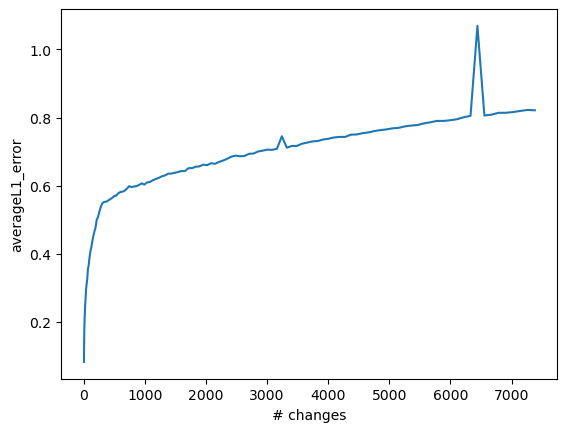

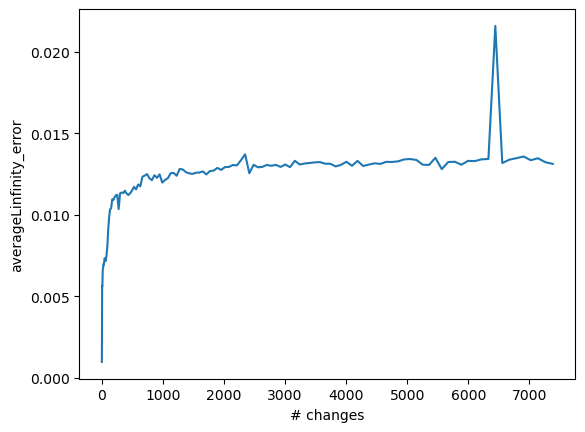

In [10]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)